/var/folders/08/9q0_t08d7c536fkv17vb6nfw0000gn/T/ipykernel_54771/640073061.py:10: DeprecationWarning: the argument `dtypes` for `read_csv` is deprecated. It was renamed to `schema_overrides` in version 0.20.31.
  df = pl.read_csv(


shape: (32_424, 5)
┌────────┬──────┬──────┬─────┬─────┐
│ t      ┆ i    ┆ j    ┆ Si  ┆ Sj  │
│ ---    ┆ ---  ┆ ---  ┆ --- ┆ --- │
│ i64    ┆ i64  ┆ i64  ┆ str ┆ str │
╞════════╪══════╪══════╪═════╪═════╡
│ 140    ┆ 1157 ┆ 1232 ┆ MED ┆ ADM │
│ 160    ┆ 1157 ┆ 1191 ┆ MED ┆ MED │
│ 500    ┆ 1157 ┆ 1159 ┆ MED ┆ MED │
│ 520    ┆ 1157 ┆ 1159 ┆ MED ┆ MED │
│ 560    ┆ 1159 ┆ 1191 ┆ MED ┆ MED │
│ …      ┆ …    ┆ …    ┆ …   ┆ …   │
│ 347600 ┆ 1295 ┆ 1629 ┆ NUR ┆ NUR │
│ 347600 ┆ 1383 ┆ 1629 ┆ PAT ┆ NUR │
│ 347620 ┆ 1232 ┆ 1295 ┆ ADM ┆ NUR │
│ 347620 ┆ 1383 ┆ 1629 ┆ PAT ┆ NUR │
│ 347640 ┆ 1295 ┆ 1629 ┆ NUR ┆ NUR │
└────────┴──────┴──────┴─────┴─────┘
Top 10 by Betweenness Centrality (with role):
Node 1098 (ADM): 0.0404
Node 1193 (NUR): 0.0352
Node 1164 (NUR): 0.0313
Node 1115 (NUR): 0.0287
Node 1109 (NUR): 0.0278
Node 1295 (NUR): 0.0268
Node 1210 (NUR): 0.0264
Node 1658 (ADM): 0.0227
Node 1190 (NUR): 0.0222
Node 1157 (MED): 0.0217

Top 10 by Degree Centrality (with role):
Node 1098 (ADM): 0.8243


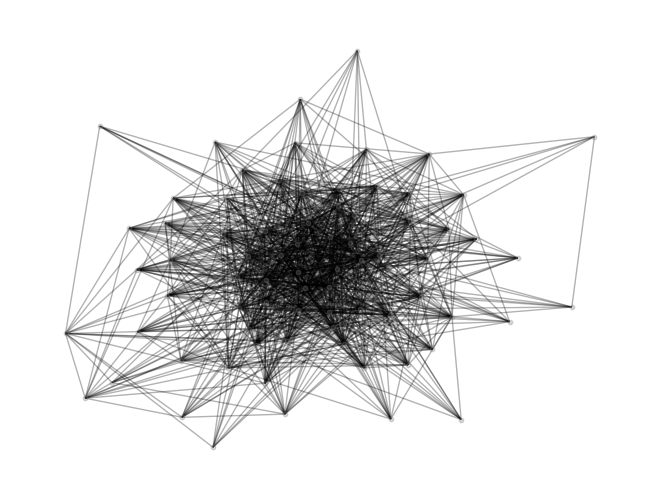

In [ ]:
# import necessary packages
import numpy as np
import networkx as nx
import polars as pl
import matplotlib.pyplot as plt
import pandas as pd


# create a table given hospital data that has: t  i  j  Si  Sj as a "header" 
# from website: "Each line has the form “t i j Si Sj“, where i and j are the anonymous IDs of the persons in contact, 
# Si and Sj are their statuses (NUR=paramedical staff, i.e. nurses and nurses’ aides; PAT=Patient; MED=Medical doctor; ADM=administrative staff), 
# and the interval during which this contact was active is [ t – 20s, t ]."

df = pl.read_csv(
    "detailed_list_of_contacts_Hospital.dat",
    separator="\t",
    has_header=False,
    new_columns=["t","i","j","Si","Sj"],
    dtypes={"t": pl.Int64, "i": pl.Int64, "j": pl.Int64, "Si": pl.Utf8, "Sj": pl.Utf8}
    # pl.Int64 = this column contains ints of 64 bits
    # pl.Utf8 = this column contains text/string values
)

# visualize network: this is an undirected graph that shows if person i and person j were ever in physical proximity with each other 
G = nx.from_pandas_edgelist(df, source='i', target='j') # i and j are anonymous ID's that were in contact with each other

nx.draw(G, node_size=10, node_color="gray", alpha=0.3)

print(df)



# STATS

# add roles to nodes as attributes
for row in df.iter_rows(named=True):
    G.nodes[row['i']]['role'] = row['Si']
    G.nodes[row['j']]['role'] = row['Sj']
    
bc = nx.betweenness_centrality(G)
dc = nx.degree_centrality(G)
ec = nx.eigenvector_centrality(G)

bc_sorted = sorted(bc.items(), key=lambda x: x[1], reverse=True)
dc_sorted = sorted(dc.items(), key=lambda x: x[1], reverse=True)
ec_sorted = sorted(ec.items(), key=lambda x: x[1], reverse=True)

# betweenness centrality: people who lie on the shortest paths between others (key bridges for transmission)
print("Top 10 by Betweenness Centrality (with role):")
for node, val in bc_sorted[:10]:
    role = G.nodes[node].get('role', 'Unknown')
    print(f"Node {node} ({role}): {val:.4f}")

# degree centrality: people who had the most direct physical contacts/highest number of unique people interacted with
print("\nTop 10 by Degree Centrality (with role):")
for node, val in dc_sorted[:10]:
    role = G.nodes[node].get('role', 'Unknown')
    print(f"Node {node} ({role}): {val:.4f}")

# eigenvector centrality: people who are connected to already well-connected people
print("\nTop 10 by Eigenvector Centrality (with role):")
for node, val in ec_sorted[:10]:
    role = G.nodes[node].get('role', 'Unknown')
    print(f"Node {node} ({role}): {val:.4f}")



